# Task 4.10 Coding etiquette and Excel reporting

## Table of contents 

- 01. Importing libraries and data
- 02. Addressing personal information and security of the data
- 03. Analyzing spending habits in different U.S. regions
- 04. Creating an exclusion flag for low-activity customers
- 05. Creating a profiling variable
- 06. Visualizing the profiling variable
- 07. Agregating summary statistics 
- 08. Comparing the profiling variable by region and department
- 09. Visualizing the comparision 
- 10. Annex: visualizations for the final report


## 01. Importing libraries and data

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy

In [2]:
# Creating a path 
path= r'C:\Users\amore\Documents\Data Analyst course\Data Immersion\Achievement 4_python\Instacard_basket_analysis_29_01_2023'

In [3]:
# importing the data ords_prods data 
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_merged_update3.pkl'))

In [4]:
# importing secondary data
df_departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

## 02. Task 4.10

**Q2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.**  

In [5]:
# Ensuring that all the columns in the dataframe will be visible
pd.set_option('display.max_columns', None)

In [6]:
ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,time_of_the_order,days_since_prior_order,First purchase,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,False,5,0,both,Mid-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,False,1,1,both,Mid-range product,Regularly busy,Regularly busy,average orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,True,4,0,both,High-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,False,1,1,both,High-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,False,5,0,both,Mid-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0


The dataframe originally contained PII data (Names and surnames of customers), but I already drop those columns in a previous revision of the data (Task 4.9), consequently the data does not contain sensible information anymore

**Q3. Create a regional segmentation of the data. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.**

- **Determine whether there’s a difference in spending habits between the different U.S. regions.**

In [7]:
# creating a new "region" column
ords_prods_merged['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [8]:
# Grouping US states by region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [9]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [10]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [11]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Creating the new "region" column
ords_prods_merged.loc[ords_prods_merged['state'].isin(Northeast), 'region'] = 'Northeast'

In [13]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(Midwest), 'region'] = 'Midwest'

In [14]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(South), 'region'] = 'South'

In [15]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(West), 'region'] = 'West'

In [16]:
# Checking the new column 
ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,time_of_the_order,days_since_prior_order,First purchase,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,False,5,0,both,Mid-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,False,1,1,both,Mid-range product,Regularly busy,Regularly busy,average orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,True,4,0,both,High-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,False,1,1,both,High-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0,Midwest
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,False,5,0,both,Mid-range product,Regularly busy,Regularly busy,most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620.0,Midwest


In [17]:
#checking differences in spending habits between different US regions
crosstab = pd.crosstab(ords_prods_merged['region'], ords_prods_merged['spending_flag'], dropna = False)

In [18]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


**Q4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample** 

In [19]:
# creating the exclusion flag 
ords_prods_merged.loc[ords_prods_merged['max_order'] < 5, 'exclusion_flag'] = 'low-activity'

In [20]:
ords_prods_merged.loc[ords_prods_merged['max_order'] >= 5, 'exclusion_flag'] = 'high-activity'

In [21]:
# Checking the results
crosstab2 = pd.crosstab(ords_prods_merged['max_order'], ords_prods_merged['exclusion_flag'], dropna = False)

In [22]:
crosstab2

exclusion_flag,high-activity,low-activity
max_order,,
1,0,5
2,0,6
3,0,686741
4,0,753543
5,793140,0
...,...,...
95,59877,0
96,40453,0
97,44949,0


In [23]:
#creating a new dataframe without the low-activity customers
ords_prods_merged2 = ords_prods_merged.loc[ords_prods_merged['exclusion_flag'] == 'high-activity']

In [24]:
#exporting the new dataframe 
ords_prods_merged2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_high_activity_customers.pkl'))

**Q5. Create a profiling variable based on age, income, certain goods in the 'department_id' and number of dependents.**

In [25]:
#importing the newly created dataframe
df_def = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_high_activity_customers.pkl'))


In [26]:
#checking descriptive statistics for income
df_def['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

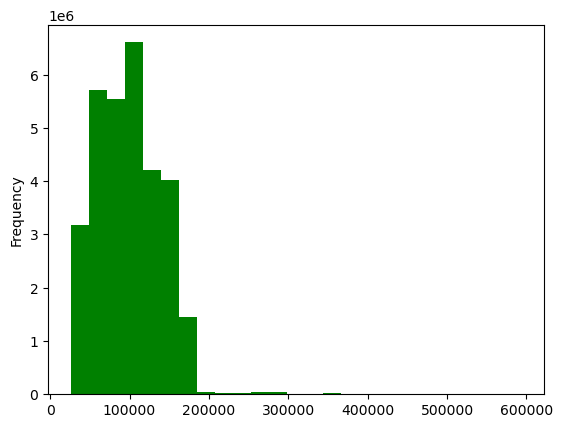

In [27]:
# creating an income histogram
hist = df_def['income'].plot.hist(bins=25, color = 'green')

In [28]:
# saving the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram.png'))

In [29]:
# calculating the income percentiles
quartile_income = list(df_def['income'].quantile([0.25, 0.5, 0.75]))

In [30]:
# checking the result
quartile_income

[67292.0, 96765.0, 128102.0]

In [31]:
# using the df_departments dataframe to identify meat (11) and baby products (18)
df_departments

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [32]:
#creating a profile for clients that eat meat 
df_def.loc[df_def['department_id'] ==11, 'profile'] = 'meat_eaters'

In [33]:
# creating a profile for high income families 
df_def.loc[(df_def['n_dependants'] > 1) & (df_def['income'] > 128102), 'profile'] = 'high-income family'

In [34]:
# creating a profile for average income families
df_def.loc[(df_def['n_dependants'] > 1) & (df_def['income'] >67292) & (df_def['income'] < 128102), 'profile'] = 'average-income family'

In [35]:
# creating a profile for low income families
df_def.loc[(df_def['n_dependants'] > 1) & (df_def['income'] < 67292), 'profile'] = 'low-income family'

In [36]:
# creating a profile for high income singles without children
df_def.loc[(df_def['fam_status'] == 'single') & (df_def ['n_dependants'] == 0) & (df_def['income'] > 128102) , 'profile'] = 'rich single adult'

In [37]:
# creating a profile for clients with babies
df_def.loc[(df_def['n_dependants'] > 0) & (df_def['department_id'] == 18), 'profile'] = 'with babies'

In [38]:
#creating a profile for rich retired 
df_def.loc[(df_def['income'] > 128102) & (df_def['age'] > 65),'profile'] ='rich retired'

In [39]:
#creating a profile for average retired 
df_def.loc[(df_def['income'] > 67292) & (df_def['income'] < 128102) & (df_def['age'] < 65), 'profile'] = 'average_retired'

In [40]:
#creating a profile for poor retired
df_def.loc[(df_def['income'] <67292) & (df_def['age'] > 65),'profile'] ='poor retired'

In [41]:
#filling NaN as "other"
df_def['profile'] = df_def['profile'].fillna('other')

In [42]:
#checking the results
df_def['profile'].value_counts(dropna = False)

average_retired          11478059
other                     6678598
low-income family         3349032
rich retired              2956480
high-income family        2343639
average-income family     1990388
poor retired               996135
rich single adult          932707
with babies                146142
meat_eaters                 93384
Name: profile, dtype: int64

**Q6. Create an appropriate visualization to show the distribution of profiles.**

Text(0.5, 0, 'Customer profiles')

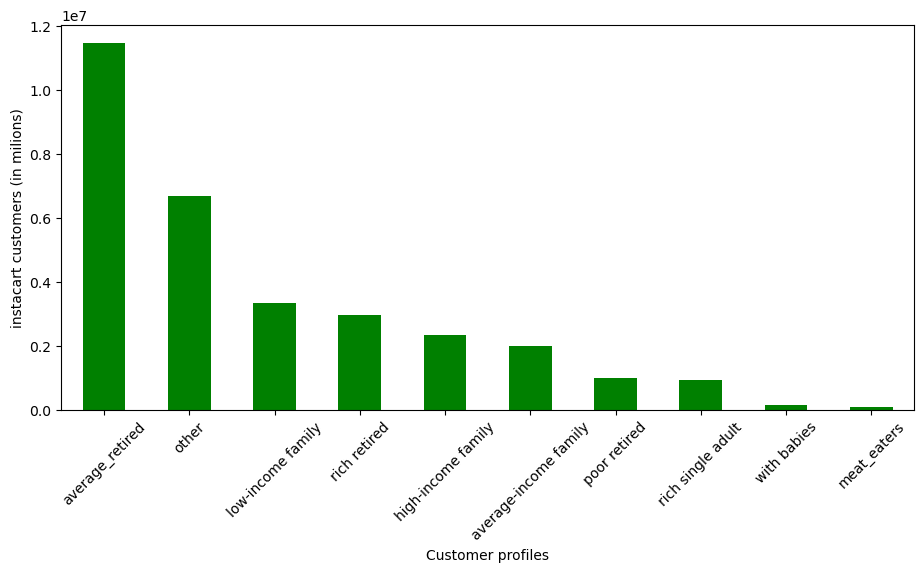

In [43]:
# creating a barchart with the profiles
bar = df_def['profile'].value_counts().plot.bar(rot=45, figsize = (11,5), color = 'green')
plt.ylabel ('instacart customers (in milions)')
plt.xlabel ('Customer profiles')

In [44]:
# Saving the figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_profiles_barchart.png'),bbox_inches = 'tight')

**Q7. Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure**

In [45]:
#comparing the max, min and mean values
df_def.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                days_since_prior_order           
                         max  min      mean                   mean  min   max
profile                                                                      
average-income family   25.0  1.0  7.950198              10.751488  0.0  30.0
average_retired         25.0  1.0  7.955465              10.758102  0.0  30.0
high-income family      25.0  1.0  7.959419              10.834471  0.0  30.0
low-income family       25.0  1.0  7.380139              10.942018  0.0  30.0
meat_eaters             15.0  1.0  7.959153              11.404019  0.0  30.0
other                   25.0  1.0  7.675126              10.870756  0.0  30.0
poor retired            25.0  1.0  6.706150              11.098158  0.0  30.0
rich retired            25.0  1.0  7.958393              10.719218  0.0  30.0
rich single adult       25.0  1.0  7.933382              10.682399  0.0  30.0
with babies             15.0  1.0  7.624491               9.886343  0.0  30.0

**Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.**

In [46]:
#comparing customer profiles and regions
crosstab3 = pd.crosstab(df_def['profile'], df_def['region'], dropna = False)

In [47]:
crosstab3

region,Midwest,Northeast,South,West
profile,,,,
average-income family,457614,357358,653739,521677
average_retired,2686464,2008046,3844728,2938821
high-income family,562870,423250,762011,595508
low-income family,782496,582944,1116235,867357
meat_eaters,22422,16932,31331,22699
other,1575710,1186992,2233125,1682771
poor retired,222604,180807,332424,260300
rich retired,687748,534962,973865,759905
rich single adult,229021,147569,313944,242173


In [48]:
# comparing customer profiles and departments
crosstab4 = pd.crosstab(df_def['profile'], df_def['department_id'], dropna = False)

In [49]:
crosstab4

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
average-income family,139432,2125,73254,609739,8147,17146,156010,6122,56657,2221,26493,48290,119920,40325,69119,341188,44574,0,159736,65629,4261
average_retired,791721,12798,419265,3457991,50857,98563,898471,34355,317424,12187,157545,268486,671607,238970,387558,1954402,251694,166158,890557,373256,24194
high-income family,165423,2768,90778,702406,12620,20440,188021,7724,66239,2236,32597,57035,141109,49432,82370,403200,54345,0,182363,77655,4878
low-income family,227591,3618,117232,939268,15680,25286,315883,9086,80635,4317,46906,59368,183416,80474,99411,539597,79627,0,405251,109324,7062
meat_eaters,0,0,0,0,0,0,0,0,0,0,93384,0,0,0,0,0,0,0,0,0,0
other,462664,7694,244788,1964571,31807,56164,586406,20151,176097,7323,0,139713,388979,153273,217528,1130293,153788,36502,664874,221764,14219
poor retired,63294,1073,31152,251005,5106,6082,114245,2484,18745,1386,14098,10285,48980,27083,23493,149623,26180,8474,161218,30197,1932
rich retired,207238,3219,109305,881194,14264,24631,237858,9768,80922,2921,40701,70115,173292,61597,100273,499683,67580,39957,229952,95825,6185
rich single adult,64368,1116,35054,273099,6146,7679,75007,3370,25417,860,12582,21489,55402,19696,32322,159196,22069,13159,72455,30184,2037


([<matplotlib.axis.XTick at 0x23982b1fb50>,
 [Text(0, 0, 'high income family'),
  Text(1, 0, 'average-income family'),
  Text(2, 0, 'low-income family'),
  Text(3, 0, 'rich retired'),
  Text(4, 0, 'average_retired'),
  Text(5, 0, 'poor retired'),
  Text(6, 0, 'rich single adult'),
  Text(7, 0, 'with babies'),
  Text(8, 0, 'meat_eaters'),
  Text(9, 0, 'other')])

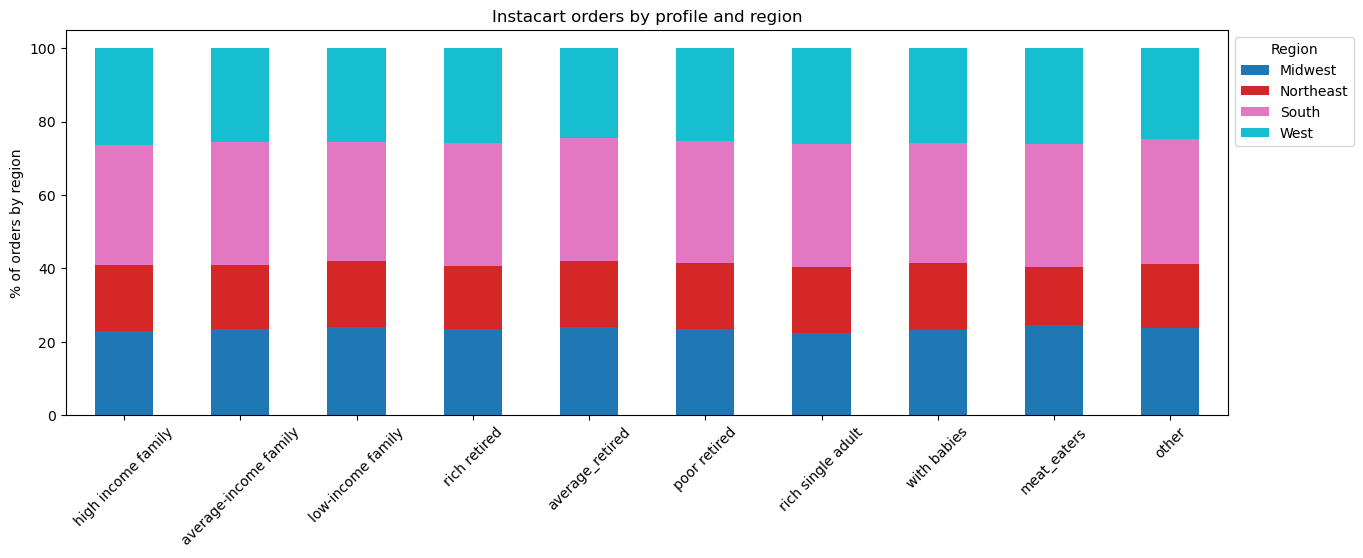

In [50]:
#creating a stacked barchart of customer profile by region
bar_profile_region = crosstab3.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'tab10').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")
plt.xticks([0,1,2,3,4,5,6,7,8,9],['high income family','average-income family','low-income family','rich retired','average_retired','poor retired','rich single adult','with babies','meat_eaters','other'])

In [51]:
#exporting the figure
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Instacart orders by profile and department')

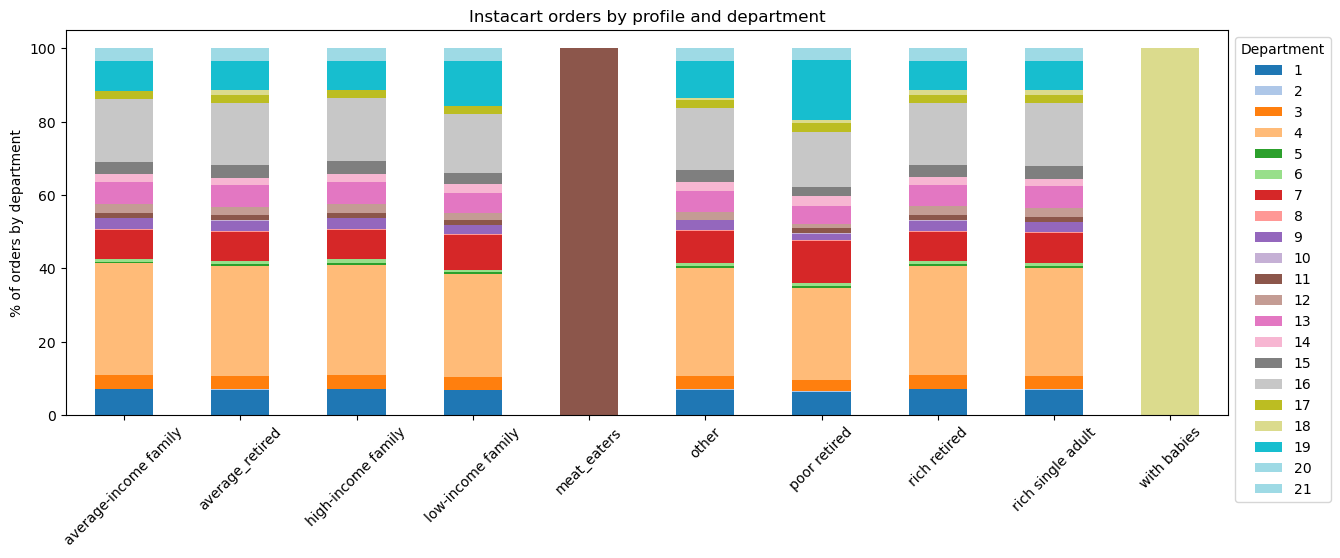

In [52]:
# Creating a stacked barchart of customer profile by department
bar_profile_department = crosstab4.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'tab20').legend(title="Department", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by department")
plt.title ("Instacart orders by profile and department")

In [53]:
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_profiles_barchart.png'), bbox_inches = 'tight')

## Extra visualizations

In [54]:
#creating a crosstab region - loyalty flag
crosstab5 = pd.crosstab(df_def['region'], df_def['loyalty_flag'], dropna = False)

In [55]:
crosstab5

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 1.0, 'Loyal customers by region')

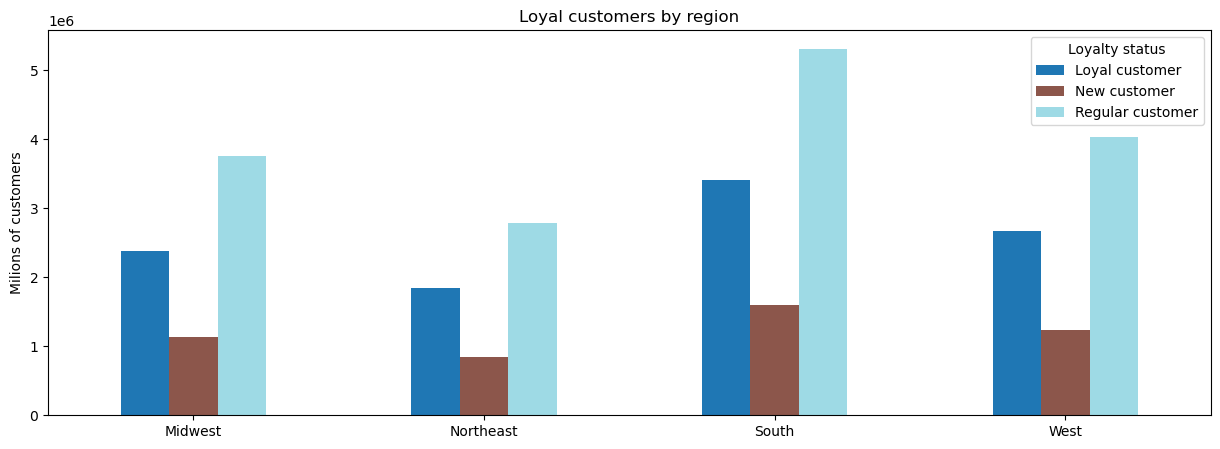

In [56]:
# creating a barchart from the crosstab
bar_loyalty_region = crosstab5.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='tab20').legend(title="Loyalty status", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Milions of customers")
plt.title ("Loyal customers by region")

In [57]:
#exporting the figure
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_region_barchart.png'))

In [58]:
# creating a crosstab of region and spending-flag
crosstab6 = pd.crosstab(df_def['region'], df_def['spending_flag'], dropna = False)

In [59]:
crosstab6

spending_flag,High Spender,Low Spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


Text(0.5, 1.0, 'Spending by region')

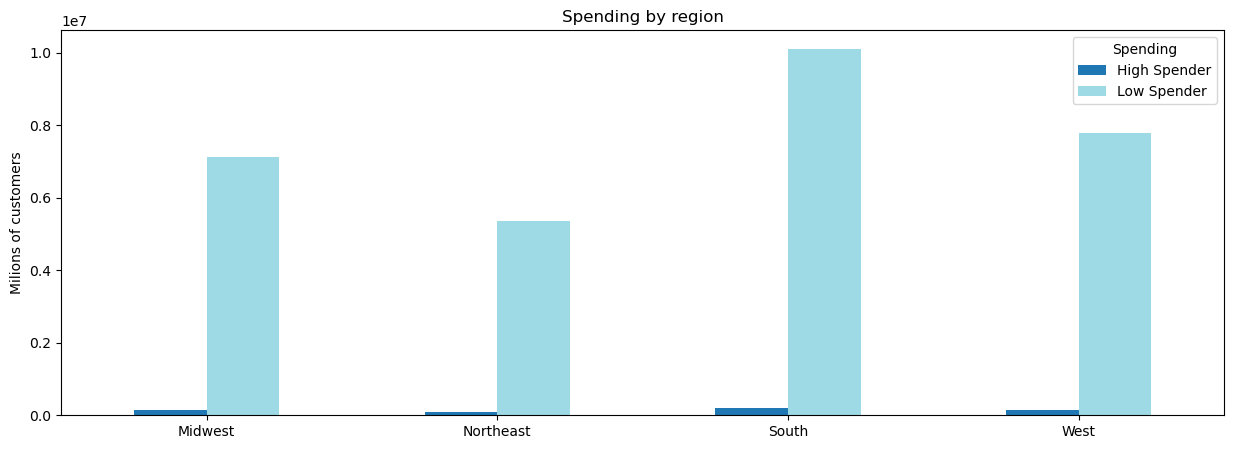

In [60]:
# creating a barchart from the crosstab
bar_spending_region = crosstab6.plot.bar(rot=0, figsize=(15,5), colormap='tab20').legend(title="Spending")
plt.xlabel("")
plt.ylabel("Milions of customers")
plt.title ("Spending by region")

In [61]:
#exporting the figure
bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','spending_region_barchart.png'))

## Answers Question 8: 

In general de different customer profiles do not seem to show different trends across the anylzed regions and the departments they purchase the most products. The loyalty and spending flags, however, make possible to detect some interesting trends. Both the highest numbers of loyal and high spending customers are found in the Southern region, which would suggest that Insacart is most succesful in that area. Conversely the Northeast has the least loyal and high spending customers 

## Visualizations for the final report

Text(0.5, 1.0, 'Instacart products price range')

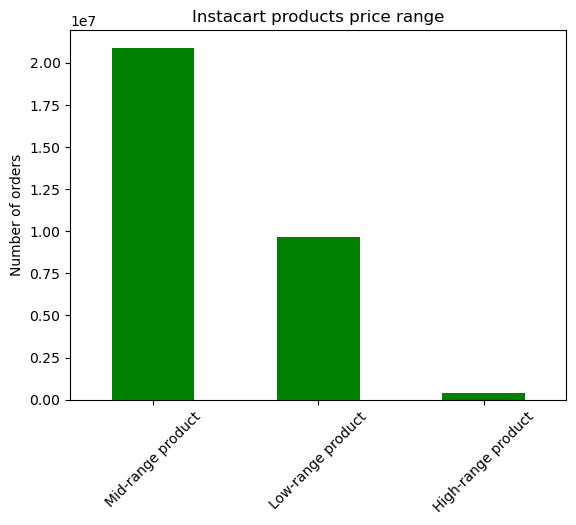

In [62]:
#creating a barchart with the price range of the products
bar_price_range =df_def['price_range_loc'].value_counts().plot.bar(rot = 45, color = 'green')
plt.xlabel("")
plt.ylabel("Number of orders")
plt.title ("Instacart products price range")

In [63]:
#saving the figure
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','product_price_range'), bbox_inches = 'tight')

In [64]:
crosstab7 = pd.crosstab(df_def['department_id'], df_def['price_range_loc'], dropna = False)

In [65]:
crosstab7

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,647617,1474114
2,0,15259,19152
3,0,274986,845842
4,0,2585708,6493565
5,0,33046,111581
6,0,73203,182788
7,0,814697,1757204
8,0,28165,64895
9,0,284346,537790


Text(0.5, 1.0, 'Orders by department and price range')

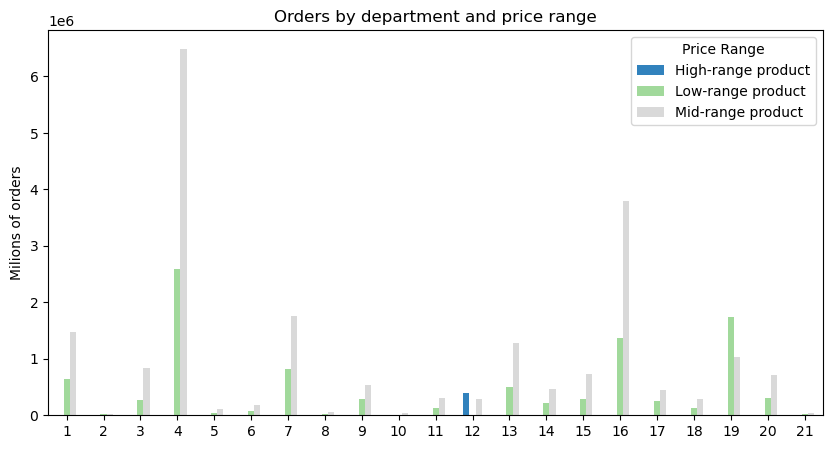

In [66]:
#creating a chart crossing price range and department id 
bar_department_price_range = crosstab7.plot.bar(rot=0, figsize=(10,5), colormap='tab20c').legend(title="Price Range")
plt.xlabel("")
plt.ylabel("Milions of orders")
plt.title ("Orders by department and price range")


In [67]:
bar_department_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_price_range.png'), bbox_inches = 'tight')

In [68]:
crosstab8 = pd.crosstab(df_def['department_id'], df_def['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'Orders by department and loyalty status')

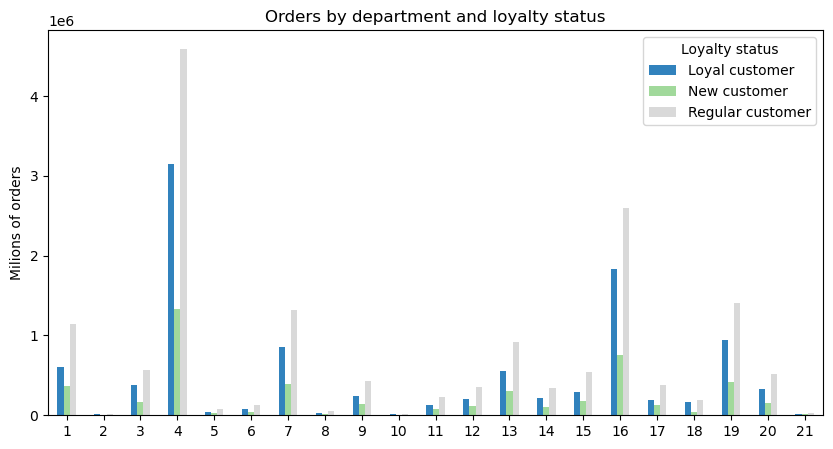

In [69]:
bar_department_loyalty = crosstab8.plot.bar(rot=0, figsize=(10,5), colormap='tab20c').legend(title="Loyalty status")
plt.xlabel("")
plt.ylabel("Milions of orders")
plt.title ("Orders by department and loyalty status")

In [70]:
bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_loyalty.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Product prices')

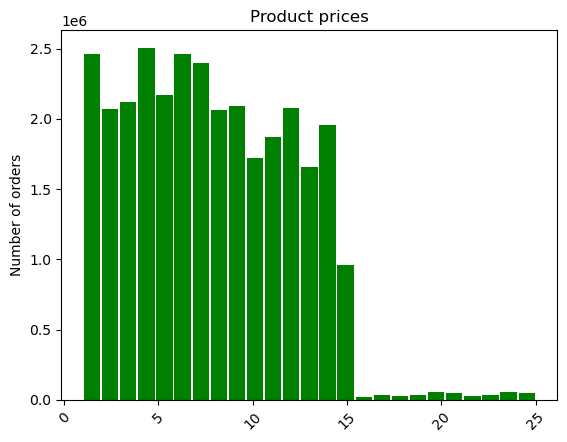

In [71]:
# creating a histogram with the product prices
hist_price_frequency =df_def['prices'].plot.hist(bins = 25,rot = 45, color = 'green', rwidth = 0.9)
plt.xlabel("")
plt.ylabel("Number of orders")
plt.title ("Product prices")

In [72]:
hist_price_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','hist_prices.png'))

In [73]:
#creating a crosstab tho cross loyalty status and regularity of orders
crosstab9 = pd.crosstab(df_def['days_since_prior_order'], df_def['loyalty_flag'], dropna = False)

In [74]:
crosstab9

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061
8.0,643383,185317,1065114


Text(0.5, 1.0, 'Loyal customers by region')

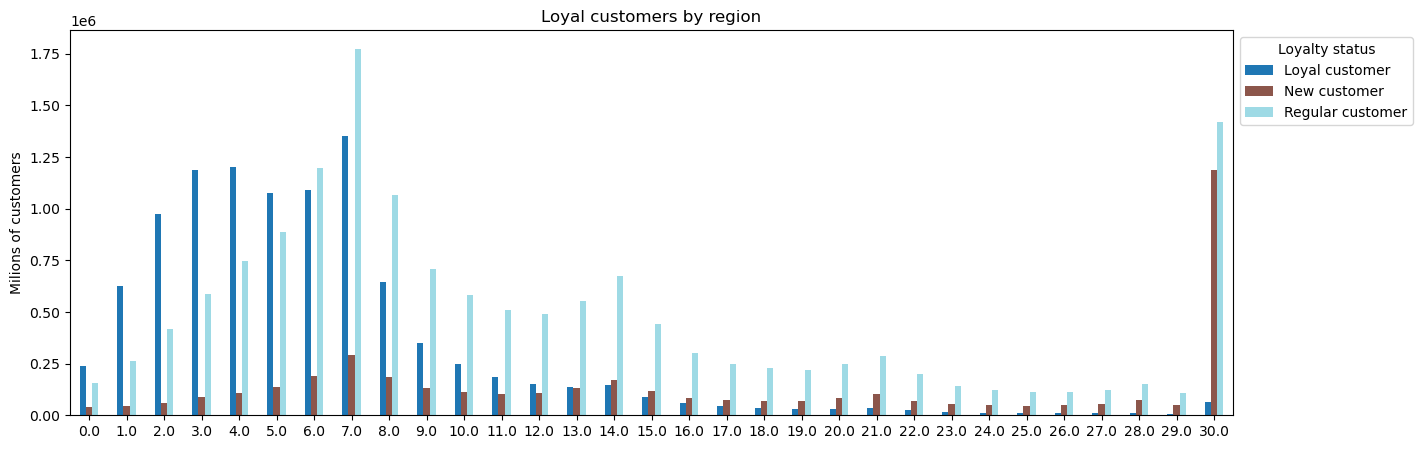

In [75]:
# creating a barchart from the crosstab
bar_loyalty_region = crosstab9.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='tab20').legend(title="Loyalty status", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Milions of customers")
plt.title ("Loyal customers by region")

Text(0.5, 1.0, 'Days passed since the prior order according to customer loyalty')

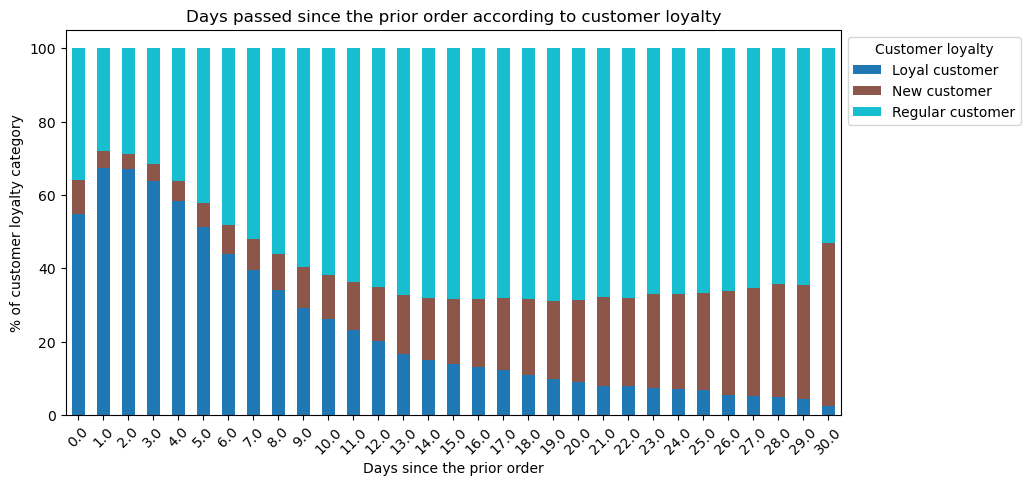

In [76]:
#creating a stacked chart of customer loyalty and days since prior order
bar_loyalty_days = crosstab9.loc[:,['Loyal customer','New customer','Regular customer']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(10,5), colormap = 'tab10').legend(title="Customer loyalty", bbox_to_anchor=(1.0,1.0))
plt.xlabel("Days since the prior order")
plt.ylabel("% of customer loyalty category")
plt.title ("Days passed since the prior order according to customer loyalty")

In [77]:
#saving the figure
bar_loyalty_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','stacked_loyalty_days.png'),bbox_inches = 'tight')